In [1]:
#import all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [84]:
#Load data
results=pd.read_csv("C:\\Users\\AIYABEI\\Downloads\\formula1\\results.csv")
driver=pd.read_csv("C:\\Users\\AIYABEI\\Downloads\\formula1\\drivers.csv")
drivers_standings=pd.read_csv("C:\\Users\\AIYABEI\\Downloads\\formula1\\driver_standings.csv")                   
races=pd.read_csv("C:\\Users\\AIYABEI\\Downloads\\formula1\\races.csv")
constructors=pd.read_csv("C:\\Users\\AIYABEI\\Downloads\\formula1\\constructors.csv")
constructors_standings=pd.read_csv("C:\\Users\\AIYABEI\\Downloads\\formula1\\constructor_standings.csv")
constructors_results=pd.read_csv("C:\\Users\\AIYABEI\\Downloads\\formula1\\constructor_results.csv")
status=pd.read_csv("C:\\Users\\AIYABEI\\Downloads\\formula1\\status.csv")
pitstops=pd.read_csv("C:\\Users\\AIYABEI\\Downloads\\formula1\\pit_stops.csv")
qualifying=pd.read_csv("C:\\Users\\AIYABEI\\Downloads\\formula1\\qualifying.csv")

In [85]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [86]:
results['fastestLapTime']

0        1:27.452
1        1:27.739
2        1:28.090
3        1:28.603
4        1:27.418
           ...   
26075    1:50.994
26076    1:50.486
26077    1:49.907
26078    1:53.138
26079          \N
Name: fastestLapTime, Length: 26080, dtype: object

In [87]:
results.describe()

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId
count,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000
mean,13041.372661,536.695667,266.277569,49.059663,11.167561,12.854141,1.906635,46.076687,17.476074
std,7530.008377,303.034639,272.581622,60.221056,7.232797,7.700068,4.219715,29.726058,26.129965
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,6520.750000,294.750000,57.000000,6.000000,5.000000,6.000000,0.000000,22.000000,1.000000
50%,13040.500000,519.000000,163.000000,25.000000,11.000000,12.000000,0.000000,53.000000,10.000000
75%,19560.250000,791.000000,364.000000,58.250000,17.000000,18.000000,2.000000,66.000000,14.000000
max,26085.000000,1110.000000,858.000000,214.000000,34.000000,39.000000,50.000000,200.000000,141.000000


In [88]:
results.count()

resultId           26080
raceId             26080
driverId           26080
constructorId      26080
number             26080
grid               26080
position           26080
positionText       26080
positionOrder      26080
points             26080
laps               26080
time               26080
milliseconds       26080
fastestLap         26080
rank               26080
fastestLapTime     26080
fastestLapSpeed    26080
statusId           26080
dtype: int64

In [89]:
results.isnull().sum()

resultId           0
raceId             0
driverId           0
constructorId      0
number             0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time               0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
dtype: int64

In [90]:
results.dtypes

resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number              object
grid                 int64
position            object
positionText        object
positionOrder        int64
points             float64
laps                 int64
time                object
milliseconds        object
fastestLap          object
rank                object
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
dtype: object

In [91]:
driver.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [10]:
merge=pd.merge(results,drivers,how='inner',on='driverId')
merge

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,fastestLapSpeed,statusId,driverRef,number_y,code,forename,surname,dob,nationality,url
0,1,18,1,1,22,1,1,1,1,10.0,...,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,27,19,1,1,22,9,5,5,5,4.0,...,209.033,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
2,57,20,1,1,22,3,13,13,13,0.0,...,203.969,11,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
3,69,21,1,1,22,5,3,3,3,6.0,...,204.323,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
4,90,22,1,1,22,3,2,2,2,8.0,...,222.085,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,25996,1106,857,1,81,8,11,11,11,0.0,...,204.960,1,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri
26076,26021,1107,857,1,81,13,16,16,16,0.0,...,222.259,11,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri
26077,26029,1108,857,1,81,3,4,4,4,12.0,...,233.435,1,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri
26078,26050,1109,857,1,81,4,5,5,5,10.0,...,190.625,1,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri


In [11]:
merge = merge.drop(['laps', 'url', 'nationality', 'dob', 'forename', 'code', 'number_y'], axis = 1)
merge.head()

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,surname
0,1,18,1,1,22,1,1,1,1,10.0,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,Hamilton
1,27,19,1,1,22,9,5,5,5,4.0,+46.548,5525103,53,3,1:35.462,209.033,1,hamilton,Hamilton
2,57,20,1,1,22,3,13,13,13,0.0,\N,\N,25,19,1:35.520,203.969,11,hamilton,Hamilton
3,69,21,1,1,22,5,3,3,3,6.0,+4.187,5903238,20,3,1:22.017,204.323,1,hamilton,Hamilton
4,90,22,1,1,22,3,2,2,2,8.0,+3.779,5213230,31,2,1:26.529,222.085,1,hamilton,Hamilton


In [12]:
status.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [13]:
d1 = pd.merge(merge, status, how="inner", on='statusId')
d1.head()


,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,surname,status
0,1,18,1,1,22,1,1,1,1,10.0,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,Hamilton,Finished
1,27,19,1,1,22,9,5,5,5,4.0,+46.548,5525103,53,3,1:35.462,209.033,1,hamilton,Hamilton,Finished
2,69,21,1,1,22,5,3,3,3,6.0,+4.187,5903238,20,3,1:22.017,204.323,1,hamilton,Hamilton,Finished
3,90,22,1,1,22,3,2,2,2,8.0,+3.779,5213230,31,2,1:26.529,222.085,1,hamilton,Hamilton,Finished
4,109,23,1,1,22,3,1,1,1,10.0,2:00:42.742,7242742,71,6,1:18.510,153.152,1,hamilton,Hamilton,Finished


In [14]:
data = d1.drop(['statusId', 'driverRef'], axis = 1)
data.head()

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,surname,status
0,1,18,1,1,22,1,1,1,1,10.0,1:34:50.616,5690616,39,2,1:27.452,218.300,Hamilton,Finished
1,27,19,1,1,22,9,5,5,5,4.0,+46.548,5525103,53,3,1:35.462,209.033,Hamilton,Finished
2,69,21,1,1,22,5,3,3,3,6.0,+4.187,5903238,20,3,1:22.017,204.323,Hamilton,Finished
3,90,22,1,1,22,3,2,2,2,8.0,+3.779,5213230,31,2,1:26.529,222.085,Hamilton,Finished
4,109,23,1,1,22,3,1,1,1,10.0,2:00:42.742,7242742,71,6,1:18.510,153.152,Hamilton,Finished


In [15]:
races = races.drop(['fp1_date','fp1_time','fp2_date','fp2_time','fp3_date','fp3_time','quali_date','quali_time','sprint_date','sprint_time'], axis = 1)
races.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [16]:
cleanedData = pd.merge(data, races, how='inner', on='raceId')
cleanedData.head()

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,fastestLapSpeed,surname,status,year,round,circuitId,name,date,time_y,url
0,1,18,1,1,22,1,1,1,1,10.0,...,218.300,Hamilton,Finished,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
1,2,18,2,2,3,5,2,2,2,8.0,...,217.586,Heidfeld,Finished,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
2,3,18,3,3,7,7,3,3,3,6.0,...,216.719,Rosberg,Finished,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
3,4,18,4,4,5,11,4,4,4,5.0,...,215.464,Alonso,Finished,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
4,5,18,5,1,23,3,5,5,5,4.0,...,218.385,Kovalainen,Finished,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...


In [17]:
constructors = constructors.drop(['constructorRef', 'nationality', 'url'], axis = 1)
d2 = pd.merge(cleanedData, constructors, how='inner', on = 'constructorId')
d2.head(10)

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,surname,status,year,round,circuitId,name_x,date,time_y,url,name_y
0,1,18,1,1,22,1,1,1,1,10.0,...,Hamilton,Finished,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,McLaren
1,5,18,5,1,23,3,5,5,5,4.0,...,Kovalainen,Finished,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,McLaren
2,27,19,1,1,22,9,5,5,5,4.0,...,Hamilton,Finished,2008,2,2,Malaysian Grand Prix,2008-03-23,07:00:00,http://en.wikipedia.org/wiki/2008_Malaysian_Gr...,McLaren
3,25,19,5,1,23,8,3,3,3,6.0,...,Kovalainen,Finished,2008,2,2,Malaysian Grand Prix,2008-03-23,07:00:00,http://en.wikipedia.org/wiki/2008_Malaysian_Gr...,McLaren
4,69,21,1,1,22,5,3,3,3,6.0,...,Hamilton,Finished,2008,4,4,Spanish Grand Prix,2008-04-27,12:00:00,http://en.wikipedia.org/wiki/2008_Spanish_Gran...,McLaren
5,83,21,5,1,23,6,\N,R,17,0.0,...,Kovalainen,Accident,2008,4,4,Spanish Grand Prix,2008-04-27,12:00:00,http://en.wikipedia.org/wiki/2008_Spanish_Gran...,McLaren
6,90,22,1,1,22,3,2,2,2,8.0,...,Hamilton,Finished,2008,5,5,Turkish Grand Prix,2008-05-11,12:00:00,http://en.wikipedia.org/wiki/2008_Turkish_Gran...,McLaren
7,100,22,5,1,23,2,12,12,12,0.0,...,Kovalainen,+1 Lap,2008,5,5,Turkish Grand Prix,2008-05-11,12:00:00,http://en.wikipedia.org/wiki/2008_Turkish_Gran...,McLaren
8,109,23,1,1,22,3,1,1,1,10.0,...,Hamilton,Finished,2008,6,6,Monaco Grand Prix,2008-05-25,12:00:00,http://en.wikipedia.org/wiki/2008_Monaco_Grand...,McLaren
9,116,23,5,1,23,4,8,8,8,1.0,...,Kovalainen,Finished,2008,6,6,Monaco Grand Prix,2008-05-25,12:00:00,http://en.wikipedia.org/wiki/2008_Monaco_Grand...,McLaren


In [18]:
FinalData = d2.drop(['constructorId','raceId','number_x', 'positionText', 'milliseconds', 'time_y','time_x','rank','url'], axis = 1)
FinalData

,resultId,driverId,grid,position,positionOrder,points,fastestLap,fastestLapTime,fastestLapSpeed,surname,status,year,round,circuitId,name_x,date,name_y
0,1,1,1,1,1,10.0,39,1:27.452,218.300,Hamilton,Finished,2008,1,1,Australian Grand Prix,2008-03-16,McLaren
1,5,5,3,5,5,4.0,43,1:27.418,218.385,Kovalainen,Finished,2008,1,1,Australian Grand Prix,2008-03-16,McLaren
2,27,1,9,5,5,4.0,53,1:35.462,209.033,Hamilton,Finished,2008,2,2,Malaysian Grand Prix,2008-03-23,McLaren
3,25,5,8,3,3,6.0,19,1:35.922,208.031,Kovalainen,Finished,2008,2,2,Malaysian Grand Prix,2008-03-23,McLaren
4,69,1,5,3,3,6.0,20,1:22.017,204.323,Hamilton,Finished,2008,4,4,Spanish Grand Prix,2008-04-27,McLaren
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,19712,663,7,\N,19,0.0,\N,\N,\N,Wharton,Spun off,1952,3,13,Belgian Grand Prix,1952-06-22,Frazer Nash
26076,19807,663,7,\N,10,0.0,\N,\N,\N,Wharton,Wheel bearing,1952,7,39,Dutch Grand Prix,1952-08-17,Frazer Nash
26077,19643,663,13,4,4,3.0,\N,\N,\N,Wharton,+2 Laps,1952,1,66,Swiss Grand Prix,1952-05-18,Frazer Nash
26078,19756,705,25,21,21,0.0,\N,\N,\N,Crook,+10 Laps,1952,5,9,British Grand Prix,1952-07-19,Frazer Nash


In [19]:
FinalData.describe()

,resultId,driverId,grid,positionOrder,points,year,round,circuitId
count,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000
mean,13041.372661,266.277569,11.167561,12.854141,1.906635,1990.553144,8.368635,23.541488
std,7530.008377,272.581622,7.232797,7.700068,4.219715,19.508665,4.949718,18.749739
min,1.000000,1.000000,0.000000,1.000000,0.000000,1950.000000,1.000000,1.000000
25%,6520.750000,57.000000,5.000000,6.000000,0.000000,1976.000000,4.000000,9.000000
50%,13040.500000,163.000000,11.000000,12.000000,0.000000,1991.000000,8.000000,18.000000
75%,19560.250000,364.000000,17.000000,18.000000,2.000000,2007.000000,12.000000,34.000000
max,26085.000000,858.000000,34.000000,39.000000,50.000000,2023.000000,22.000000,79.000000


In [20]:
FinalData.isnull().sum()

resultId           0
driverId           0
grid               0
position           0
positionOrder      0
points             0
fastestLap         0
fastestLapTime     0
fastestLapSpeed    0
surname            0
status             0
year               0
round              0
circuitId          0
name_x             0
date               0
name_y             0
dtype: int64

### Question 1: What is the likelyness that a driver will finish in a desired position if they finish 1st in qualifying?

In [21]:
FinalData[(FinalData['grid'] == 1)].shape[0]

1102

#### Podium Positions

In [22]:
# 1 grid, 1 Position = 1 / 1102 =42.1% Chance of finishing 1st
(FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] == 1)].shape[0]/1102) * 100


42.10526315789473

In [23]:
# 1 grid, 2 Position = 1 / 1102 =14.2% Chance of finishing 2nd
(FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] == 2)].shape[0]/1102) * 100


14.156079854809436

In [24]:
# 1 grid, 3 Position = 1 / 1102 = 6.7% Chance of finishing 3rd 
FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] == 3)].shape[0]/1102*100


6.715063520871143

#### Non Podiums - In points

In [25]:
# 1 grid, 4 Position = 1 / 1102 = 4.3% Chance of finishing 4th
FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] == 4)].shape[0]/1102*100


4.26497277676951

In [26]:
# 1 grid, 5 Position = 1 / 1102 =1.9% Chance of finishing 5th
FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] == 5)].shape[0]/1102*100


1.9056261343012704

In [27]:
# 1 grid, 6 Position = 1 / 1102 =1.7% Chance of finishing 6th
FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] == 6)].shape[0]/1102*100


1.7241379310344827

In [28]:
# 1 grid, 7 Position = 1 / 1102 =5.65% Chance of finishing 7th
FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] == 7)].shape[0]/230*100


5.6521739130434785

In [29]:
# 1 grid, 8 Position = 2 / 1102 = 1.6%  chance of finishing 8th
FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] == 8)].shape[0]/1102*100


1.6333938294010888

In [30]:
# 1 grid, 9 Position = 2 / 1102 = 1.45% chance of finishing 9th
FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] == 9)].shape[0]/1102*100


1.4519056261343013

In [31]:
# 1 grid, 10 Position = 2 / 1102 = 0.91% chance of finishing 10th
FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] == 10)].shape[0]/1102*100


0.9074410163339384

In [32]:
FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] <= 10)].shape[0]/1102*100

76.04355716878402

In [33]:
FinalData[(FinalData['grid'] == 1)].shape[0]

1102

In [34]:
# Simple automation for finding data for my bar chart
# First Place on Grid: 
for i in range(1,15):
    print(FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] == i)].shape[0])


464
156
74
47
21
19
13
18
16
10
16
26
20
24


In [35]:
# Simple automation for finding data for my bar chart
# Second Place on Grid: 
for i in range(1,15):
    print(FinalData[(FinalData['grid'] == 2) & (FinalData['positionOrder'] == i)].shape[0])


259
224
120
58
41
17
33
17
20
10
23
18
20
20


In [36]:
# Simple automation for finding data for my bar chart
# Third Place on Grid: 
for i in range(1,15):
    print(FinalData[(FinalData['grid'] == 3) & (FinalData['positionOrder'] == i)].shape[0])


134
200
175
92
62
35
19
23
22
17
16
15
15
27


In [37]:
# Simple automation for finding data for my bar chart
# Fourth Place on Grid: 
for i in range(1,15):
    print(FinalData[(FinalData['grid'] == 4) & (FinalData['positionOrder'] == i)].shape[0])


66
152
153
128
79
59
43
22
23
21
22
21
30
21


In [38]:
# Simple automation for finding data for my bar chart
# Fifth Place on Grid: 
for i in range(1,15):
    print(FinalData[(FinalData['grid'] == 5) & (FinalData['positionOrder'] == i)].shape[0])


48
94
131
136
92
60
45
31
31
31
24
28
17
41


In [39]:
# Simple automation for finding data for my bar chart
# Sixth Place on Grid: 
for i in range(1,11):
    print(FinalData[(FinalData['grid'] == 6) & (FinalData['positionOrder'] == i)].shape[0])


39
71
94
108
98
92
66
38
41
30


In [40]:
# Simple automation for finding data for my bar chart
# Seventh Place on Grid: 
for i in range(1,15):
    print(FinalData[(FinalData['grid'] == 7) & (FinalData['positionOrder'] == i)].shape[0])


23
53
70
80
113
97
87
58
42
41
30
33
38
33


### Driver Final Position based on Grid position

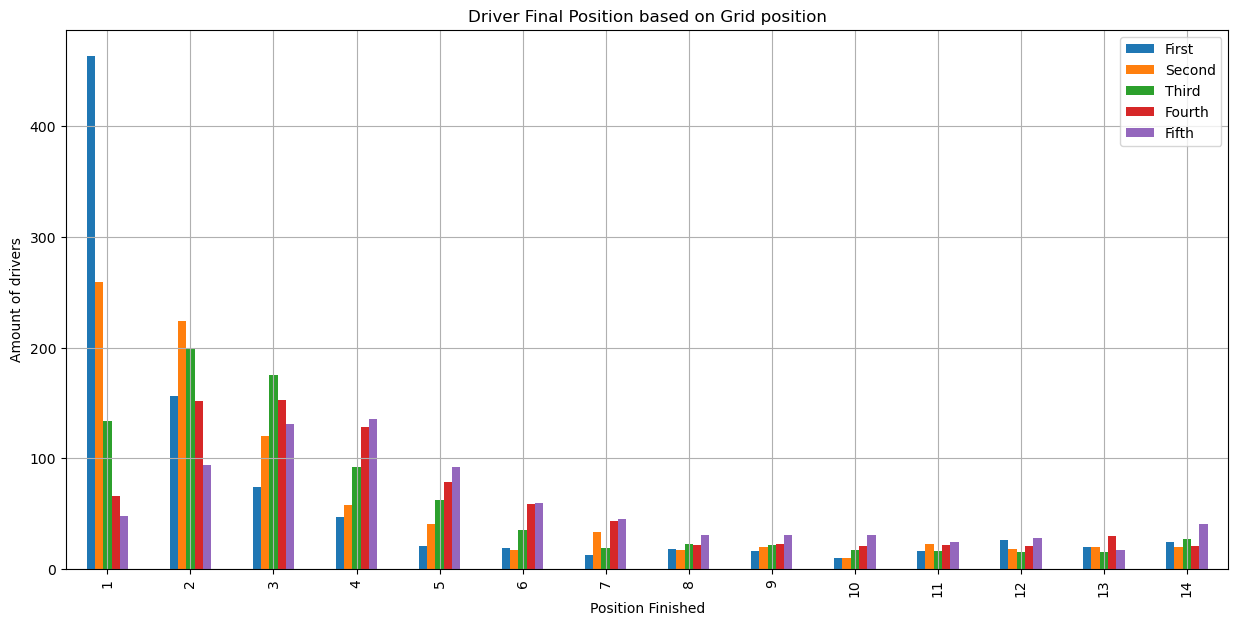

In [41]:
import matplotlib.pyplot as plt
First = [464,156,74,47,21,19,13,18,16,10,16,26,20,24]
Second =[259,224,120,58,41,17,33,17,20,10,23,18,20,20]
Third = [134,200,175,92,62,35,19,23,22,17,16,15,15,27]
Fourth =[66,152,153,128,79,59,43,22,23,21,22,21,30,21]
Fifth = [48,94,131,136,92,60,45,31,31,31,24,28,17,41]
Sixth = [39,71,94,108,98,92,66,38,41,30]
Seventh = [23,53,70,80,113,97,87,58,42,41,30,33,38,33]



index =['1','2','3','4','5','6','7','8','9','10','11','12','13','14']

barPlot=pd.DataFrame({
    'First':First,
    'Second':Second,
    'Third':Third,
    'Fourth':Fourth,
    'Fifth':Fifth
    
},index=index)

barPlot.plot.bar(title='Driver Final Position based on Grid position', figsize=(15,7), grid = True)
plt.xlabel('Position Finished')
plt.ylabel('Amount of drivers')
plt.show()

## Question 2: If you qualify 1, 2 or 3: what is the chance you will finish on the podium?

### QUALIFIED 1ST


In [42]:
#finished 1st
FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] == 1)].shape[0]/1102*100


42.10526315789473

In [43]:
#,finished 2nd
FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] == 2)].shape[0]/1102*100


14.156079854809436

In [44]:
#finish 3rd
FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] == 3)].shape[0]/1102*100


6.715063520871143

In [45]:
#Finished top 3
FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] > 3)].shape[0]/1102*100

37.02359346642468

In [46]:
#Qualified 1st,finished >3rd
FinalData[(FinalData['grid'] == 1) & (FinalData['positionOrder'] <= 3)].shape[0]/1102*100


62.976406533575314

### QUALIFIED 2ND

In [47]:
#finished 1st
FinalData[(FinalData['grid'] == 2) & (FinalData['positionOrder'] == 1)].shape[0]/1102*100


23.502722323049003

In [48]:
#finished 2nd
FinalData[(FinalData['grid'] == 2) & (FinalData['positionOrder'] == 2)].shape[0]/1102*100


20.326678765880217

In [49]:
#finished 3rd
FinalData[(FinalData['grid'] == 2) & (FinalData['positionOrder'] == 3)].shape[0]/1102*100


10.88929219600726

In [50]:
#Finished top 3
FinalData[(FinalData['grid'] == 2) & (FinalData['positionOrder'] <= 3)].shape[0]/1102*100

54.71869328493648

In [51]:
#finished > 3rd
FinalData[(FinalData['grid'] == 2) & (FinalData['positionOrder'] > 3)].shape[0]/1102*100


44.37386569872958

### QUALIFIED 3RD

In [52]:
#finished 1st
FinalData[(FinalData['grid'] == 3) & (FinalData['positionOrder'] == 1)].shape[0]/1102*100


12.159709618874773

In [53]:
#finished 2nd
FinalData[(FinalData['grid'] == 3) & (FinalData['positionOrder'] == 2)].shape[0]/1102*100


18.148820326678766

In [54]:
#finished 3rd
FinalData[(FinalData['grid'] == 3) & (FinalData['positionOrder'] == 3)].shape[0]/1102*100


15.88021778584392

In [55]:
#Finished top 3
FinalData[(FinalData['grid'] == 3) & (FinalData['positionOrder'] <= 3)].shape[0]/1102*100

46.18874773139746

In [56]:
#finished >3rd
FinalData[(FinalData['grid'] == 3) & (FinalData['positionOrder'] > 3)].shape[0]/1102*100


53.26678765880217

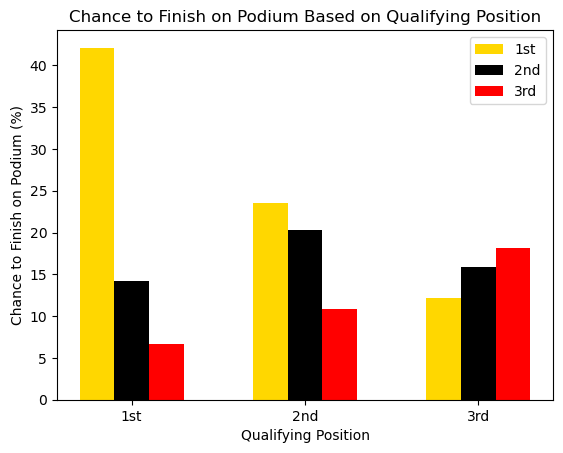

In [57]:
# Data for the graph
qualifying_positions = ['1st', '2nd', '3rd']
chance_to_finish_1st = [42.105, 23.502, 12.160]
chance_to_finish_2nd = [14.156, 20.327, 15.880]
chance_to_finish_3rd = [6.715, 10.889, 18.149]

# Create subplots
fig, ax = plt.subplots()

# Set the width of the bars
bar_width = 0.2

# Set the position of each bar on the x-axis
x = range(len(qualifying_positions))

# Create the bars for each qualifying position
plt.bar(x, chance_to_finish_1st, width=bar_width, label='1st', color='gold')
plt.bar([i + bar_width for i in x], chance_to_finish_2nd, width=bar_width, label='2nd', color='black')
plt.bar([i + 2 * bar_width for i in x], chance_to_finish_3rd, width=bar_width, label='3rd', color='red')

# Set the x-axis labels
plt.xlabel('Qualifying Position')
plt.xticks([i + bar_width for i in x], qualifying_positions)

# Set the y-axis label
plt.ylabel('Chance to Finish on Podium (%)')

# Set the title
plt.title('Chance to Finish on Podium Based on Qualifying Position')

# Add a legend
plt.legend()

# Show the plot
plt.show()

### Drivers with Most Pole Positions

In [58]:
mostPole = FinalData[FinalData['grid'] == 1]['surname'].value_counts().idxmax()
print("Driver with most Grid One:", mostPole)

Driver with most Grid One: Hamilton


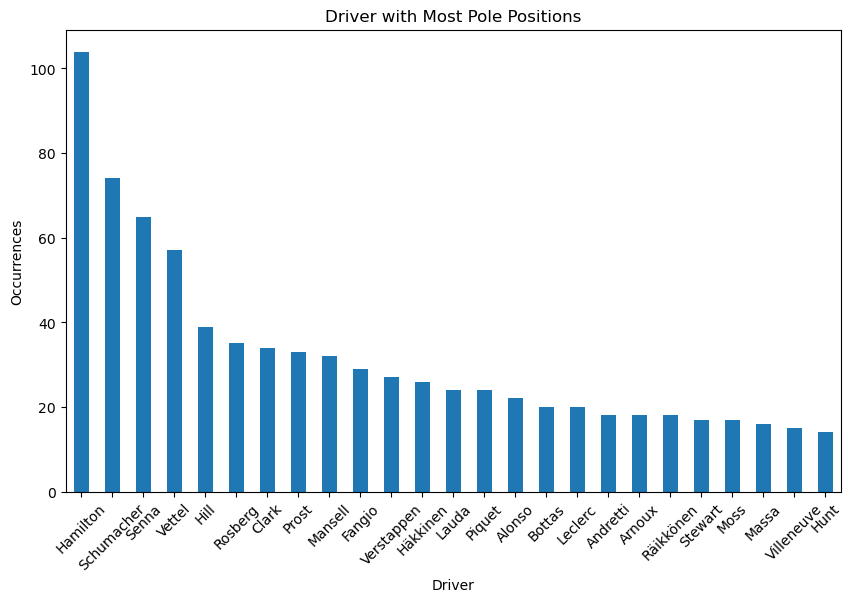

In [59]:
max_disp_names = 25

# Filter the top N constructors based on wins.


drivers = FinalData[FinalData['grid'] == 1]['surname'].value_counts().head(max_disp_names)
plt.figure(figsize=(10, 6))
drivers.plot(kind='bar')
plt.title('Driver with Most Pole Positions')
plt.xlabel('Driver')
plt.ylabel('Occurrences')
plt.xticks(rotation=45)
plt.show()


### Constructor Team with Most Grid One:

In [60]:
mostPole_constructor = FinalData[FinalData['grid'] == 1]['name_y'].value_counts().idxmax()
print("Constructor Team with most Grid One:", mostPole_constructor)


Constructor Team with most Grid One: Ferrari


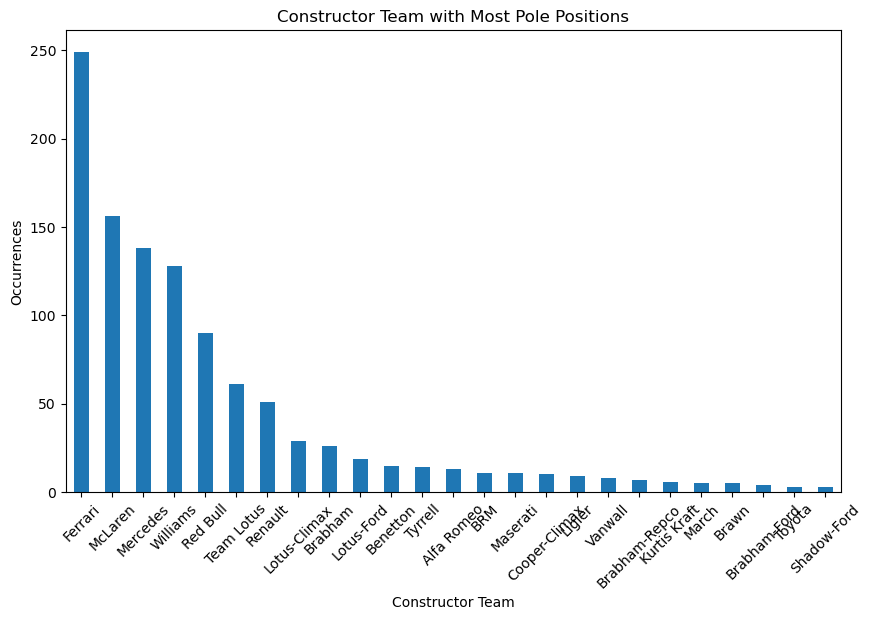

In [61]:
constructor_teams = FinalData[FinalData['grid'] == 1]['name_y'].value_counts().head(max_disp_names)
plt.figure(figsize=(10, 6))
constructor_teams.plot(kind='bar')
plt.title('Constructor Team with Most Pole Positions')
plt.xlabel('Constructor Team')
plt.ylabel('Occurrences')
plt.xticks(rotation=45)
plt.show()


### Analysis of Driver in Position 1 Dominating Races:

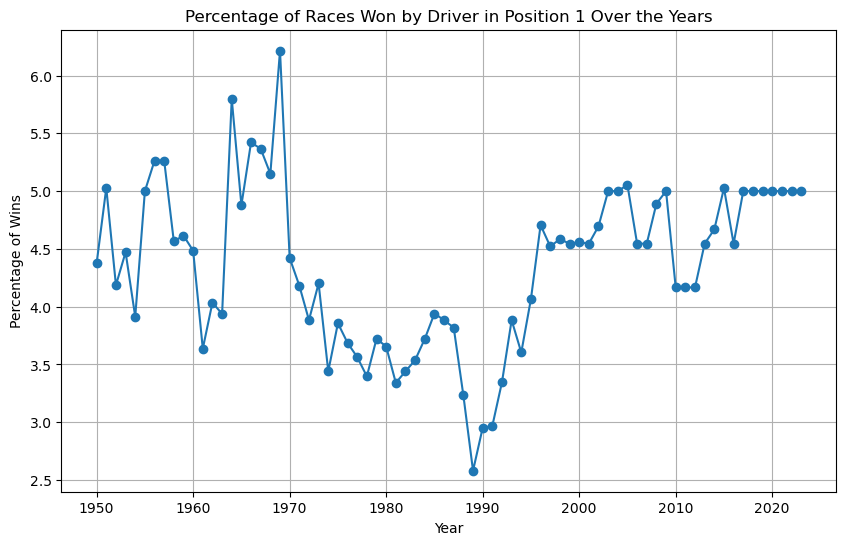

In [62]:
# Group the data by year and count the number of times the driver in position 1 won
position_1_wins_by_year = FinalData[FinalData['grid'] == 1].groupby('year').size()
total_races_by_year = FinalData.groupby('year').size()
percentage_wins_by_year = (position_1_wins_by_year / total_races_by_year) * 100

# Create a line chart to visualize the dominance
plt.figure(figsize=(10, 6))
plt.plot(percentage_wins_by_year.index, percentage_wins_by_year.values, marker='o', linestyle='-')
plt.title('Percentage of Races Won by Driver in Position 1 Over the Years')
plt.xlabel('Year')
plt.ylabel('Percentage of Wins')
plt.grid(True)
plt.show()


In [63]:
# Group the data by year and find the driver with the maximum points in each year
leading_driver_in_points = FinalData.groupby(['year', 'surname'])['points'].sum().reset_index()
leading_driver_in_points = leading_driver_in_points.loc[leading_driver_in_points.groupby('year')['points'].idxmax()]

print("Leading Driver in Points During the Years:")
print(leading_driver_in_points)


Leading Driver in Points During the Years:
      year     surname  points
24    1950      Farina   30.00
100   1951      Fangio   37.00
165   1952      Ascari   53.50
269   1953      Ascari   46.50
397   1954      Fangio   57.14
...    ...         ...     ...
3033  2019    Hamilton  413.00
3055  2020    Hamilton  347.00
3090  2021  Verstappen  388.50
3110  2022  Verstappen  433.00
3132  2023  Verstappen  292.00

[74 rows x 3 columns]


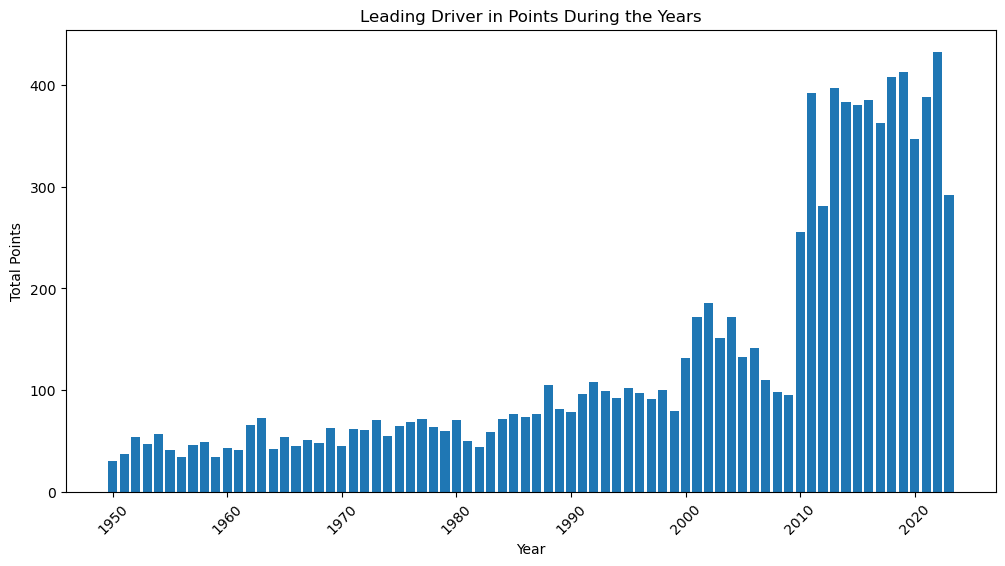

In [64]:
plt.figure(figsize=(12, 6))
plt.bar(leading_driver_in_points['year'], leading_driver_in_points['points'])
plt.title('Leading Driver in Points During the Years')
plt.xlabel('Year')
plt.ylabel('Total Points')
plt.xticks(rotation=45)
plt.show()


## Next Section: Between 2013 and 2014, a decision was made to manipulate the formula of the cars. Starting in 2014, there would be a new V6 engine with 1600cc / 8 gearbox.
CC is the displacement volume of the engine, so it means that that the engine has more cylinders and a higher swept volume which directly translates into horse power and torque of the vehicle.

https://bleacherreport.com/articles/2003467-are-2014-formula-1-cars-slower-analysing-lap-times-at-australian-grand-prix

Between 2013 and 14 there was a 1.77 second drop in fastest average laptime between racers that stayed on the same team.

Sebastian Vettel: Difference in Race times between 2013 and 2014 average in each race: -2.29 seconds

Fernando Alonso: Difference in Race times between 2013 and 2014 average in each race: -2.07 seconds

Nico Rosberg: Difference in Race times between 2013 and 2014 average in each race: -1.78 seconds

Felipe Massa: Difference in Race times between 2013 and 2014 average in each race: -0.92 seconds

In [65]:
#Checking drivers average lap time Below

In [66]:
FinalData[((FinalData['year'] == 2013) | (FinalData['year'] == 2014)) & ((FinalData['surname'] == 'Vettel'))].sort_values(by=['surname','name_x']).head(6)


,resultId,driverId,grid,position,positionOrder,points,fastestLap,fastestLapTime,fastestLapSpeed,surname,status,year,round,circuitId,name_x,date,name_y
4588,22064,20,2,1,1,25.0,51,1:43.893,192.451,Vettel,Finished,2013,17,24,Abu Dhabi Grand Prix,2013-11-03,Red Bull
4623,22525,20,19,8,8,8.0,51,1:45.552,189.427,Vettel,Finished,2014,19,24,Abu Dhabi Grand Prix,2014-11-23,Red Bull
4560,21714,20,1,3,3,15.0,42,1:30.409,211.160,Vettel,Finished,2013,1,1,Australian Grand Prix,2013-03-17,Red Bull
5030,22147,20,12,\N,18,0.0,26,1:37.064,196.682,Vettel,Engine,2014,1,1,Australian Grand Prix,2014-03-16,Red Bull
4604,22304,20,12,\N,21,0.0,30,1:14.254,209.734,Vettel,Electrical,2014,8,70,Austrian Grand Prix,2014-06-22,Red Bull
4566,21778,20,2,1,1,25.0,55,1:36.961,200.938,Vettel,Finished,2013,4,3,Bahrain Grand Prix,2013-04-21,Red Bull


In [67]:
FinalData[((FinalData['year'] == 2013) | (FinalData['year'] == 2014)) & ((FinalData['surname'] == 'Alonso'))].sort_values(by=['surname','name_x']).head(6)


,resultId,driverId,grid,position,positionOrder,points,fastestLap,fastestLapTime,fastestLapSpeed,surname,status,year,round,circuitId,name_x,date,name_y
6777,22068,4,10,5,5,10.0,55,1:43.434,193.305,Alonso,Finished,2013,17,24,Abu Dhabi Grand Prix,2013-11-03,Ferrari
6813,22526,4,8,9,9,4.0,45,1:47.424,186.126,Alonso,Finished,2014,19,24,Abu Dhabi Grand Prix,2014-11-23,Ferrari
6749,21713,4,5,2,2,18.0,53,1:29.560,213.162,Alonso,Finished,2013,1,1,Australian Grand Prix,2013-03-17,Ferrari
7233,22133,4,5,4,4,12.0,57,1:33.186,204.867,Alonso,Finished,2014,1,1,Australian Grand Prix,2014-03-16,Ferrari
6793,22288,4,4,5,5,10.0,58,1:12.595,214.527,Alonso,Finished,2014,8,70,Austrian Grand Prix,2014-06-22,Ferrari
6755,21785,4,3,8,8,4.0,41,1:37.204,200.436,Alonso,Finished,2013,4,3,Bahrain Grand Prix,2013-04-21,Ferrari


In [68]:
FinalData[((FinalData['year'] == 2013) | (FinalData['year'] == 2014)) & ((FinalData['surname'] == 'Rosberg'))].sort_values(by=['surname','name_x']).head(6)


,resultId,driverId,grid,position,positionOrder,points,fastestLap,fastestLapTime,fastestLapSpeed,surname,status,year,round,circuitId,name_x,date,name_y
9139,22066,3,3,3,3,15.0,51,1:44.458,191.410,Rosberg,Finished,2013,17,24,Abu Dhabi Grand Prix,2013-11-03,Mercedes
9175,22531,3,1,14,14,0.0,17,1:46.869,187.092,Rosberg,+1 Lap,2014,19,24,Abu Dhabi Grand Prix,2014-11-23,Mercedes
9111,21731,3,6,\N,20,0.0,18,1:32.259,206.926,Rosberg,Electrical,2013,1,1,Australian Grand Prix,2013-03-17,Mercedes
9526,22130,3,3,1,1,25.0,19,1:32.478,206.436,Rosberg,Finished,2014,1,1,Australian Grand Prix,2014-03-16,Mercedes
9155,22284,3,3,1,1,25.0,50,1:12.598,214.518,Rosberg,Finished,2014,8,70,Austrian Grand Prix,2014-06-22,Mercedes
9117,21786,3,1,9,9,2.0,48,1:37.588,199.647,Rosberg,Finished,2013,4,3,Bahrain Grand Prix,2013-04-21,Mercedes


In [69]:
FinalData[((FinalData['year'] == 2013) | (FinalData['year'] == 2014)) & ((FinalData['surname'] == 'Massa'))].sort_values(by=['surname','name_x']).head(6)


,resultId,driverId,grid,position,positionOrder,points,fastestLap,fastestLapTime,fastestLapSpeed,surname,status,year,round,circuitId,name_x,date,name_y
2227,22519,13,4,2,2,36.0,47,1:44.826,190.738,Massa,Finished,2014,19,24,Abu Dhabi Grand Prix,2014-11-23,Williams
6778,22071,13,7,8,8,4.0,52,1:45.447,189.615,Massa,Finished,2013,17,24,Abu Dhabi Grand Prix,2013-11-03,Ferrari
2648,22149,13,9,\N,20,0.0,2,1:40.287,190.361,Massa,Collision,2014,1,1,Australian Grand Prix,2014-03-16,Williams
6750,21715,13,4,4,4,12.0,38,1:30.239,211.558,Massa,Finished,2013,1,1,Australian Grand Prix,2013-03-17,Ferrari
2207,22287,13,1,4,4,12.0,63,1:12.586,214.553,Massa,Finished,2014,8,70,Austrian Grand Prix,2014-06-22,Williams
2199,22180,13,7,7,7,6.0,40,1:39.272,196.260,Massa,Finished,2014,3,3,Bahrain Grand Prix,2014-04-06,Williams


In [70]:
FinalData[((FinalData['year'] == 2013) | (FinalData['year'] == 2014)) & ((FinalData['surname'] == 'Button'))].sort_values(by=['surname','name_x']).head(6)


,resultId,driverId,grid,position,positionOrder,points,fastestLap,fastestLapTime,fastestLapSpeed,surname,status,year,round,circuitId,name_x,date,name_y
196,22075,18,12,12,12,0.0,43,1:46.336,188.030,Button,Finished,2013,17,24,Abu Dhabi Grand Prix,2013-11-03,McLaren
232,22522,18,6,5,5,20.0,47,1:46.739,187.320,Button,Finished,2014,19,24,Abu Dhabi Grand Prix,2014-11-23,McLaren
168,21720,18,10,9,9,2.0,41,1:30.198,211.654,Button,Finished,2013,1,1,Australian Grand Prix,2013-03-17,McLaren
652,22132,18,10,3,3,15.0,39,1:32.917,205.460,Button,Finished,2014,1,1,Australian Grand Prix,2014-03-16,McLaren
212,22294,18,11,11,11,0.0,60,1:12.858,213.752,Button,Finished,2014,8,70,Austrian Grand Prix,2014-06-22,McLaren
174,21787,18,10,10,10,1.0,49,1:37.743,199.330,Button,Finished,2013,4,3,Bahrain Grand Prix,2013-04-21,McLaren


In [71]:
FinalData[((FinalData['year'] == 2013) | (FinalData['year'] == 2014)) & ((FinalData['surname'] == 'Ricciardo'))].sort_values(by=['surname','name_x']).head(6)


,resultId,driverId,grid,position,positionOrder,points,fastestLap,fastestLapTime,fastestLapSpeed,surname,status,year,round,circuitId,name_x,date,name_y
4624,22521,817,20,4,4,24.0,50,1:44.496,191.341,Ricciardo,Finished,2014,19,24,Abu Dhabi Grand Prix,2014-11-23,Red Bull
5537,22079,817,9,16,16,0.0,46,1:46.042,188.551,Ricciardo,+1 Lap,2013,17,24,Abu Dhabi Grand Prix,2013-11-03,Toro Rosso
5029,22151,817,2,\N,22,0.0,\N,\N,\N,Ricciardo,Disqualified,2014,1,1,Australian Grand Prix,2014-03-16,Red Bull
5510,21730,817,14,\N,19,0.0,33,1:30.881,210.063,Ricciardo,Hydraulics,2013,1,1,Australian Grand Prix,2013-03-17,Toro Rosso
4603,22291,817,5,8,8,4.0,55,1:13.060,213.161,Ricciardo,Finished,2014,8,70,Austrian Grand Prix,2014-06-22,Red Bull
4596,22177,817,13,4,4,12.0,38,1:39.269,196.266,Ricciardo,Finished,2014,3,3,Bahrain Grand Prix,2014-04-06,Red Bull


In [72]:
FinalData[((FinalData['year'] == 2013) | (FinalData['year'] == 2014)) & ((FinalData['surname'] == 'Bottas'))].sort_values(by=['surname','name_x']).head(6)


,resultId,driverId,grid,position,positionOrder,points,fastestLap,fastestLapTime,fastestLapSpeed,surname,status,year,round,circuitId,name_x,date,name_y
2192,22078,822,15,15,15,0.0,54,1:44.351,191.607,Bottas,+1 Lap,2013,17,24,Abu Dhabi Grand Prix,2013-11-03,Williams
2228,22520,822,3,3,3,30.0,54,1:45.727,189.113,Bottas,Finished,2014,19,24,Abu Dhabi Grand Prix,2014-11-23,Williams
2163,21725,822,16,14,14,0.0,42,1:30.652,210.594,Bottas,+1 Lap,2013,1,1,Australian Grand Prix,2013-03-17,Williams
2647,22134,822,15,5,5,10.0,56,1:32.616,206.128,Bottas,Finished,2014,1,1,Australian Grand Prix,2014-03-16,Williams
2208,22286,822,2,3,3,15.0,63,1:12.581,214.568,Bottas,Finished,2014,8,70,Austrian Grand Prix,2014-06-22,Williams
2170,21791,822,15,14,14,0.0,57,1:38.192,198.419,Bottas,Finished,2013,4,3,Bahrain Grand Prix,2013-04-21,Williams


In [73]:
FinalData[((FinalData['year'] == 2013) | (FinalData['year'] == 2014)) & ((FinalData['surname'] == 'Hamilton'))].sort_values(by=['surname','name_x']).head(6)


,resultId,driverId,grid,position,positionOrder,points,fastestLap,fastestLapTime,fastestLapSpeed,surname,status,year,round,circuitId,name_x,date,name_y
9138,22070,1,4,7,7,6.0,47,1:45.463,189.586,Hamilton,Finished,2013,17,24,Abu Dhabi Grand Prix,2013-11-03,Mercedes
9174,22518,1,2,1,1,50.0,49,1:45.599,189.342,Hamilton,Finished,2014,19,24,Abu Dhabi Grand Prix,2014-11-23,Mercedes
9110,21716,1,3,5,5,10.0,45,1:29.759,212.689,Hamilton,Finished,2013,1,1,Australian Grand Prix,2013-03-17,Mercedes
9527,22148,1,1,\N,19,0.0,2,1:49.947,173.636,Hamilton,Engine,2014,1,1,Australian Grand Prix,2014-03-16,Mercedes
9154,22285,1,9,2,2,18.0,41,1:12.217,215.650,Hamilton,Finished,2014,8,70,Austrian Grand Prix,2014-06-22,Mercedes
9116,21782,1,9,5,5,10.0,48,1:38.204,198.395,Hamilton,Finished,2013,4,3,Bahrain Grand Prix,2013-04-21,Mercedes


<Axes: title={'center': '2013 Indicator against 2014 Average Lap Time'}>

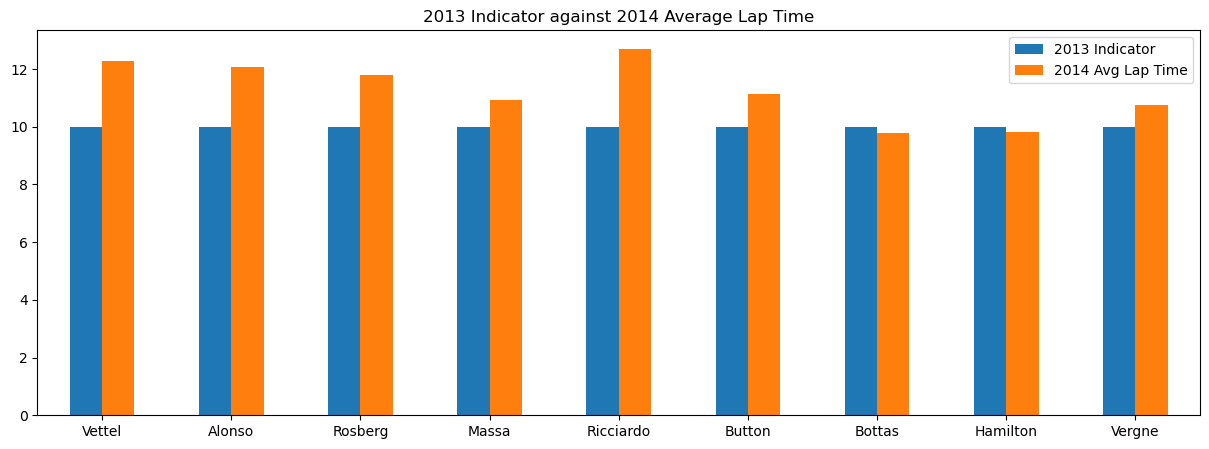

In [74]:
# The chart below signifies a 2014 average lap time versus a 2013 indicator time. 
Initial = [10,10,10,10, 10, 10, 10, 10, 10]
SpeedIn2014 = [12.29, 12.07, 11.78, 10.92, 12.71, 11.12, 9.79, 9.82, 10.77]
index = ['Vettel', 'Alonso', 'Rosberg', 'Massa', 'Ricciardo', 'Button', 'Bottas', 'Hamilton', 'Vergne']
df = pd.DataFrame({'2013 Indicator': Initial, '2014 Avg Lap Time': SpeedIn2014}, index=index)
df.plot.bar(rot=0, figsize=(15,5), title = '2013 Indicator against 2014 Average Lap Time')


## Analysis 1: How many drivers, who did not start the race in the first position, went on to win the race?

In [75]:
print("Number of winners: " +str(len(FinalData[FinalData['positionOrder'] ==1 ])))

Number of winners: 1094


In [76]:
P1=FinalData[FinalData['positionOrder']==1]
NotPole=P1['surname'].nunique()
print(f"Number of drivers who did not start in the first position and went on to win: {NotPole}")

Number of drivers who did not start in the first position and went on to win: 108


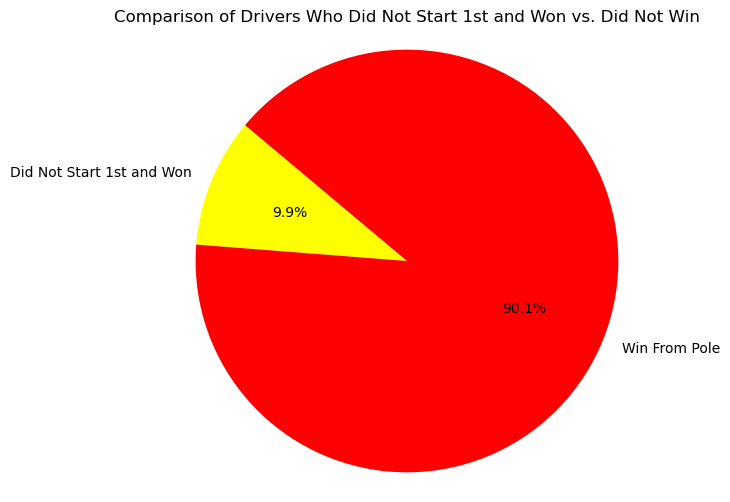

In [77]:
# Data for the pie chart
did_not_start_1st_and_won = 108 
winFromP1 = 986

# Labels for the pie chart segments
labels = ['Did Not Start 1st and Won', 'Win From Pole']

# Sizes of the pie chart segments
sizes = [did_not_start_1st_and_won, winFromP1]

# Colors for the segments
colors = ['yellow', 'red']

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Set the title
plt.title('Comparison of Drivers Who Did Not Start 1st and Won vs. Did Not Win')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()


## Analysis 2: Who is the driver who has won the most number of Formula 1 championships in history? 

In [92]:
driver.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [99]:
drivers_standingsDf=pd.DataFrame(drivers_standings)
driversDf=pd.DataFrame(driver)

drivers_standingsDf=drivers_standingsDf.sort_values('driverId')
driversDf




,level_0,index,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,0,0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,1,1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,2,2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,3,3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,4,4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...,...,...
852,852,852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher
853,853,853,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Zhou_Guanyu
854,854,854,856,de_vries,21,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries
855,855,855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri


In [104]:
driversDf['driverId']=driversDf['driverId'].astype('int')
datas=pd.merge(drivers_standingsDf,driver,on='driverId',how='left')

datas.groupby(['driverRef']).count().sort_values(by='wins',ascending=False,inplace=True)

datas=datas[datas['position']==1]
datas['surname'].value_counts()


Hamilton       125
Schumacher     121
Prost           79
Vettel          63
Alonso          52
Senna           48
Hill            48
Verstappen      44
Lauda           42
Fangio          35
Stewart         33
Rosberg         32
Fittipaldi      28
Häkkinen        27
Mansell         25
Brabham         24
Clark           22
Button          20
Piquet          19
Scheckter       15
Andretti        15
Ascari          14
Reutemann       13
Räikkönen       12
Hulme           12
Jones           11
Rindt            8
Moss             7
Farina           7
Villeneuve       7
McLaren          6
Regazzoni        6
Webber           6
Alboreto         6
Irvine           5
Bottas           5
Hawthorn         5
Leclerc          5
Pironi           4
Laffite          4
Taruffi          3
Arnoux           3
Watson           3
Coulthard        3
Massa            2
Trintignant      2
von Trips        2
Collins          2
de Angelis       2
Bandini          1
Rodríguez        1
Behra            1
Musso       

In [109]:
!pip install chart_studio
import plotly.graph_objs as go

import chart_studio
import chart_studio.plotly as py
colors = ['grey'] * 55
colors[0] = 'crimson'

chart_studio.tools.set_credentials_file(username='pratikp', api_key='AHxozWNTaluAU7sx4YW7')

driverWins=[go.Bar(x=datas["surname"].value_counts().index, y=datas["surname"].value_counts().values, marker_color=colors)]
py.iplot(driverWins,filename='Wins by Drivers')


## Analysis 3: How have the pitstop times changed over the years?

One important aspect in Formula One racing is pit stops. Pit stops play a major role in determining who goes on to win the race and depending on how efficiently time is managed during pit stops, wins are decided by milliseconds.



In 2010, tyre rules were changed. Bridgestone,a major tyre provider, withdrew from formula 1 racing and in June 2011, Pirelli announced that it will be providing tyres to teams from the following year. Refuelling was banned during races. These changes led to a drastic decrease in pitstop times as can be seen in the line graph below.

In [143]:
pitstops = pd.merge(races,pitstops, on='raceId')
pitstops

C:\Users\AIYABEI\AppData\Local\Temp\ipykernel_19092\1455775892.py:1: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'time_y'} in the result is deprecated and will raise a MergeError in a future version.



,raceId,year,round,circuitId,name,date,time_x,url,fp1_date,fp1_time,...,quali_date_y,quali_time_y,sprint_date_y,sprint_time_y,driverId,stop,lap,time_y,duration,milliseconds
0,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,...,\N,\N,\N,\N,153,1,1,17:05:23,26.898,26898
1,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,...,\N,\N,\N,\N,30,1,1,17:05:52,25.021,25021
2,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,...,\N,\N,\N,\N,17,1,11,17:20:48,23.426,23426
3,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,...,\N,\N,\N,\N,4,1,12,17:22:34,23.251,23251
4,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,...,\N,\N,\N,\N,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10084,1110,2023,12,13,Belgian Grand Prix,2023-07-30,13:00:00,https://en.wikipedia.org/wiki/2023_Belgian_Gra...,2023-07-28,11:30:00,...,2023-07-28,15:00:00,2023-07-29,14:30:00,4,2,29,15:59:01,23.798,23798
10085,1110,2023,12,13,Belgian Grand Prix,2023-07-30,13:00:00,https://en.wikipedia.org/wiki/2023_Belgian_Gra...,2023-07-28,11:30:00,...,2023-07-28,15:00:00,2023-07-29,14:30:00,830,2,30,16:00:16,23.012,23012
10086,1110,2023,12,13,Belgian Grand Prix,2023-07-30,13:00:00,https://en.wikipedia.org/wiki/2023_Belgian_Gra...,2023-07-28,11:30:00,...,2023-07-28,15:00:00,2023-07-29,14:30:00,848,3,33,16:07:06,23.529,23529
10087,1110,2023,12,13,Belgian Grand Prix,2023-07-30,13:00:00,https://en.wikipedia.org/wiki/2023_Belgian_Gra...,2023-07-28,11:30:00,...,2023-07-28,15:00:00,2023-07-29,14:30:00,858,3,34,16:09:09,23.109,23109


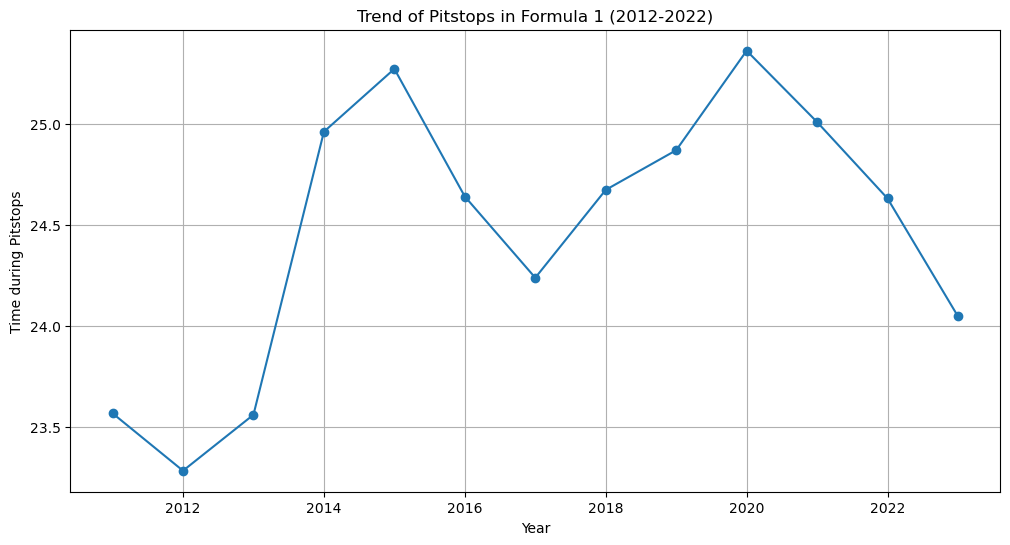

In [144]:
pitstops['duration'] = pd.to_numeric(pitstops['duration'], errors='coerce')

pitstopsYearly=pitstops.groupby('year')['duration'].mean()


# Create a line chart to visualize the trend of pitstops over the years
plt.figure(figsize=(12, 6))
plt.plot(pitstopsYearly.index, pitstopsYearly.values, marker='o', linestyle='-')
plt.title('Trend of Pitstops in Formula 1 (2012-2022)')
plt.xlabel('Year')
plt.ylabel('Time during Pitstops')
plt.grid(True)

plt.show()


In [148]:
pitstops['year_x'] = pd.to_datetime(pitstops['year_x']).dt.year
pitstop_avg_by_season = pitstops.groupby('year')['duration'].mean().reset_index()

pitstop_avg_by_season 

,year,duration
0,2011,23.568104
1,2012,23.283770
2,2013,23.560905
3,2014,24.962164
4,2015,25.273400
5,2016,24.641467
6,2017,24.239159
7,2018,24.674284
8,2019,24.870613
9,2020,25.363242


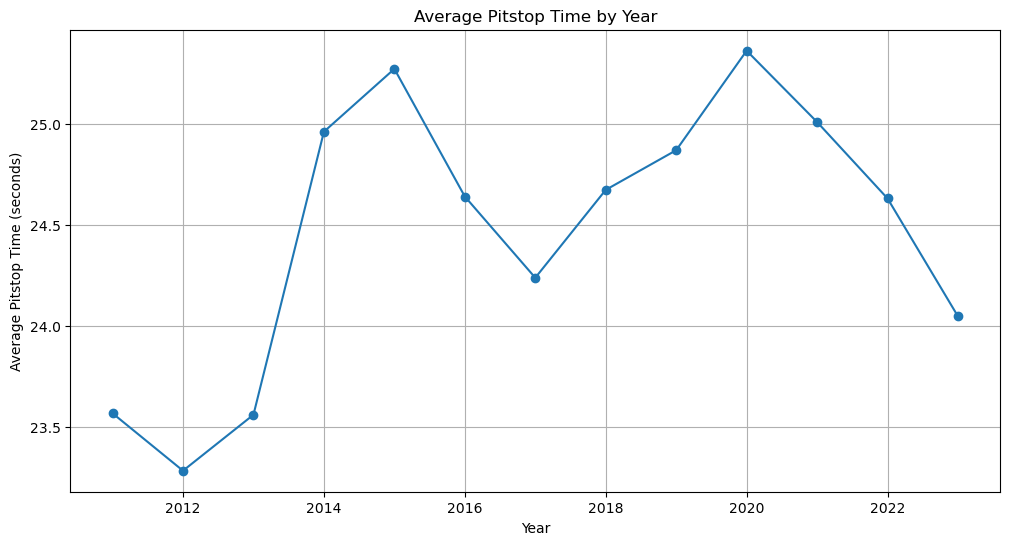

In [149]:
# Seasonal Analysis - Average Pitstop Time by Year
pitstop_avg_by_season = pitstops.groupby('year')['duration'].mean().reset_index()

# Line Graph - Average Pitstop Time by Year
plt.figure(figsize=(12, 6))
plt.plot(pitstop_avg_by_season['year'], pitstop_avg_by_season['duration'], marker='o', linestyle='-')
plt.title('Average Pitstop Time by Year')
plt.xlabel('Year')
plt.ylabel('Average Pitstop Time (seconds)')
plt.grid(True)
plt.show()

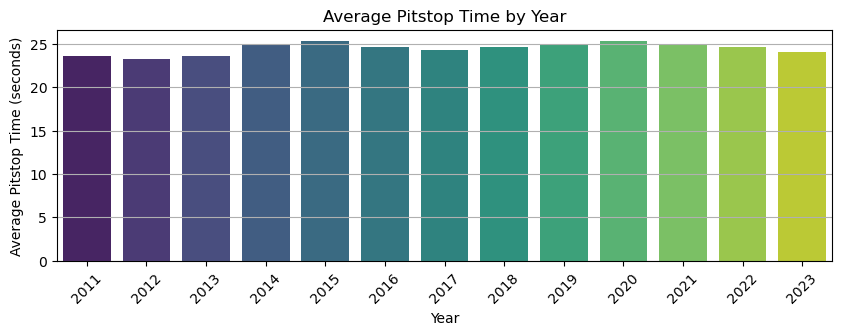

In [164]:
# Bar Graph - Average Pitstop Time by Year
plt.figure(figsize=(10, 3))
sns.barplot(data=pitstop_avg_by_season, x='year', y='duration', palette='viridis')
plt.title('Average Pitstop Time by Year')
plt.xlabel('Year')
plt.ylabel('Average Pitstop Time (seconds)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [165]:

# Merge Constructor Results and Constructor Standings to get constructor wins and points.
constructor_wins_and_points = pd.merge(constructors_results,constructors_standings,on=['raceId','constructorId'])

# Merge the merged dataset with Constructors to get constructor names.
constructor_info = pd.merge(constructor_wins_and_points,constructors)

constructorsChamps=pd.merge(constructor_info,races,on='raceId')

# Group data by constructor and count wins.
constructor_wins = constructor_wins_and_points.groupby('constructorId')['wins'].sum().reset_index()

# Group data by year and constructor to find the constructor with the highest points each season.
constructor_highest_points = constructorsChamps.groupby(['constructorId', 'name_x'])['points_x'].sum().reset_index()
constructor_highest_points = constructor_highest_points.sort_values(by=['points_x'], ascending=[False])
constructor_highest_points = constructorsChamps.groupby('year').first().reset_index()

# Find the constructor team with the highest points overall.
constructor_highest_points_overall = constructor_info.groupby('constructorId')['points_x'].sum().idxmax()
constructor_team_highest_points = constructors.loc[constructors['constructorId'] == constructor_highest_points_overall, 'name'].values[0]


# Create a DataFrame for each result.
df_constructor_wins = pd.DataFrame({'Constructor ID': constructor_wins['constructorId'], 'Wins': constructor_wins['wins']})
df_constructor_highest_points = constructor_highest_points[['year', 'constructorId', 'name_x', 'points_x']]
df_constructor_highest_points.rename(columns={'name': 'Constructor Name', 'points': 'Points'}, inplace=True)
df_constructor_highest_points['Year'] = df_constructor_highest_points['year'].astype(int)
df_constructor_highest_points = df_constructor_highest_points[['year', 'name_x', 'points_x']]
df_constructor_highest_points_overall = pd.DataFrame({'Constructor Team with Highest Points Overall': [constructor_team_highest_points]})

# Display the results.
print("Constructor Wins:")
print(df_constructor_wins)

print("\nConstructor Team with the Highest Points Each Season:")
print(df_constructor_highest_points)

print("\nConstructor Team with the Highest Points Overall:")
print(f"The constructor team with the highest points overall is {df_constructor_highest_points_overall}.")


Constructor Wins:
     Constructor ID  Wins
0                 1  1603
1                 2    12
2                 3   934
3                 4   352
4                 5     5
..              ...   ...
154             209     0
155             210     0
156             211     2
157             213    10
158             214    12

[159 rows x 2 columns]

Constructor Team with the Highest Points Each Season:
    year   name_x  points_x
0   1958  Ferrari      10.0
1   1959  Ferrari       4.0
2   1960  Ferrari       2.0
3   1961  Ferrari       9.0
4   1962  Ferrari       4.0
..   ...      ...       ...
61  2019  McLaren       0.0
62  2020  McLaren      26.0
63  2021  McLaren      18.0
64  2022  McLaren       0.0
65  2023  McLaren       0.0

[66 rows x 3 columns]

Constructor Team with the Highest Points Overall:
The constructor team with the highest points overall is   Constructor Team with Highest Points Overall
0                                      Ferrari.


C:\Users\AIYABEI\AppData\Local\Temp\ipykernel_19092\2684689800.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\AIYABEI\AppData\Local\Temp\ipykernel_19092\2684689800.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



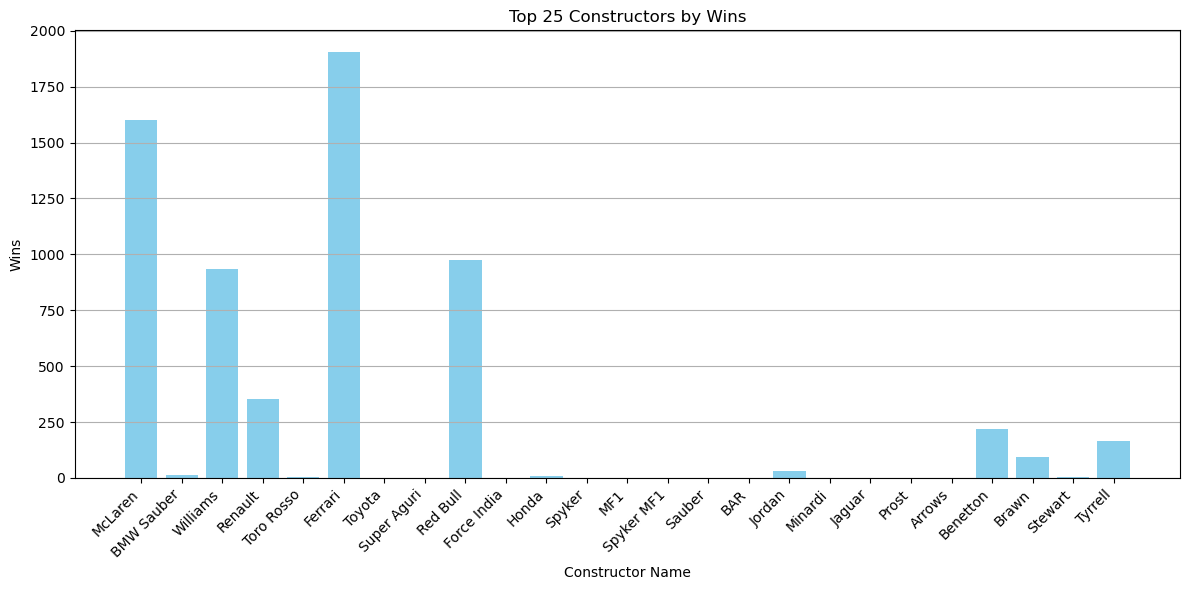

In [166]:
# Assuming you have the DataFrame 'df_constructor_wins' with columns 'Constructor ID' and 'Wins'.
df_constructor_wins_with_names = df_constructor_wins.merge(constructors, left_on='Constructor ID', right_on='constructorId')
# Sort the DataFrame by wins in descending order.
df_constructor_wins_with_names=df_constructor_wins_with_names.sort_values(by='Wins',ascending=False)


df_constructor_wins_with_names = df_constructor_wins.merge(constructors, left_on='Constructor ID', right_on='constructorId')

# Set the maximum number of constructor names to display on the x-axis.
max_display_names = 25

# Filter the top N constructors based on wins.
top_constructors = df_constructor_wins_with_names.head(max_display_names)

plt.figure(figsize=(12, 6))
plt.bar(top_constructors['name'], top_constructors['Wins'], color='skyblue')
plt.xlabel('Constructor Name')
plt.ylabel('Wins')
plt.title(f'Top {max_display_names} Constructors by Wins')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



### Descriptive Analysis

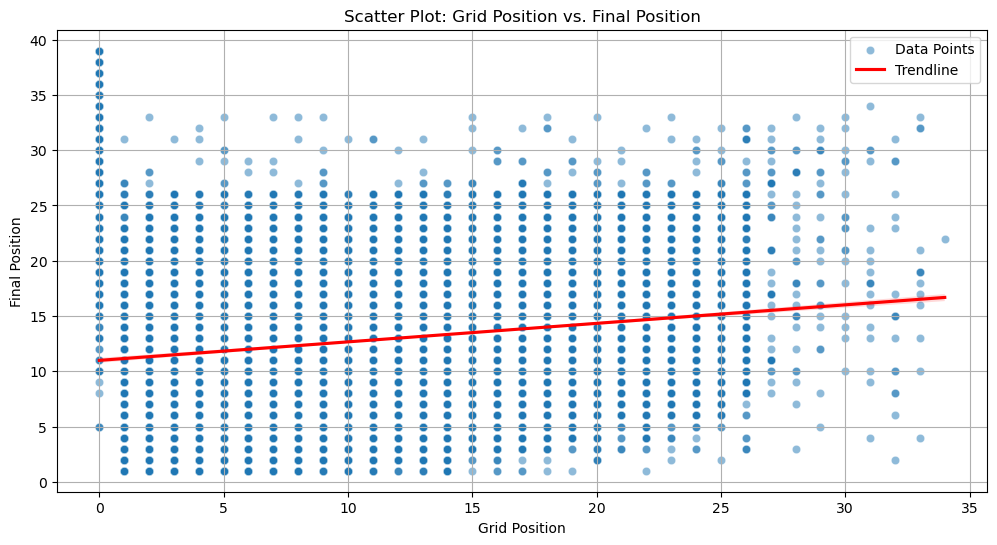

In [171]:
# Scatter Plot with Trendline
plt.figure(figsize=(12, 6))
sns.scatterplot(x='grid', y='positionOrder', data=FinalData, alpha=0.5, label='Data Points')
sns.regplot(x='grid', y='positionOrder', data=FinalData, scatter=False, color='red', label='Trendline')
plt.title('Scatter Plot: Grid Position vs. Final Position')
plt.xlabel('Grid Position')
plt.ylabel('Final Position')
plt.legend()
plt.grid(True)

# Highlight Exceptional Performances
# You can add code here to highlight specific data points or races that deviate from the trendline

plt.show()




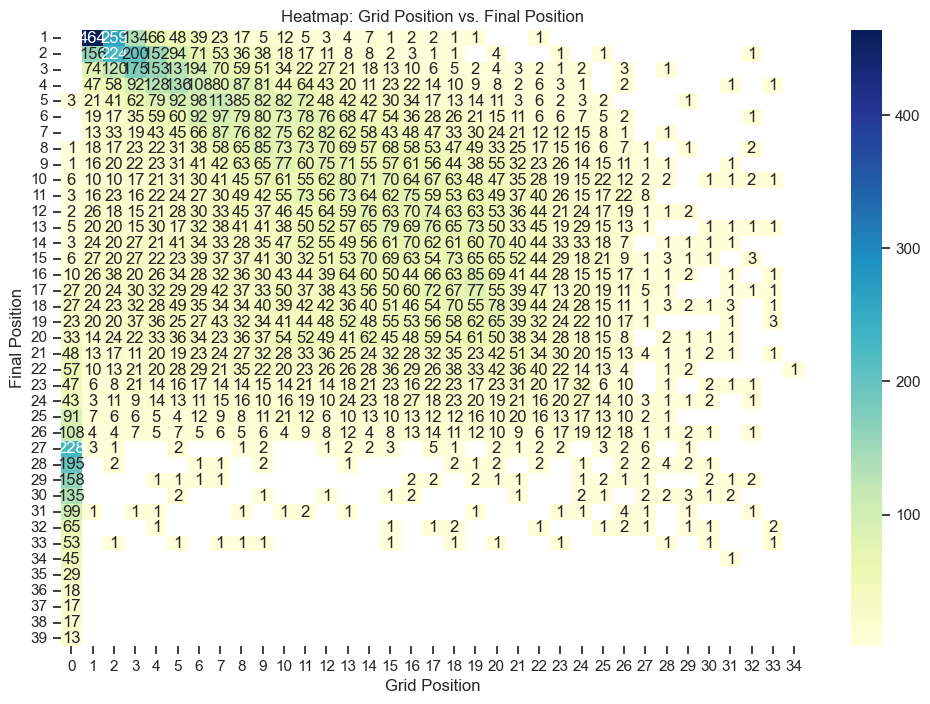

In [180]:
# Heatmap
heatmap_data = FinalData.pivot_table(index='positionOrder', columns='grid', values='resultId', aggfunc='count')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g', cbar=True)
plt.title('Heatmap: Grid Position vs. Final Position')
plt.xlabel('Grid Position')
plt.ylabel('Final Position')
plt.show()






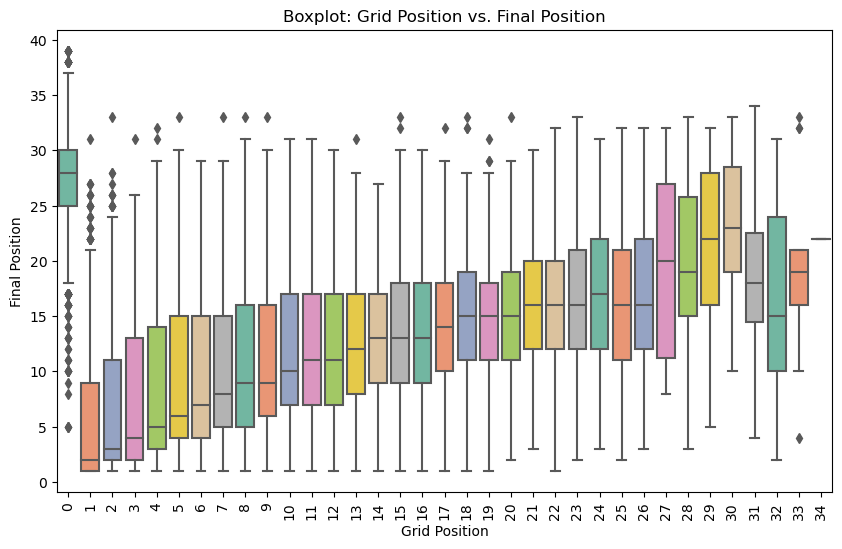

In [168]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='grid', y='positionOrder', data=FinalData, palette='Set2')
plt.title('Boxplot: Grid Position vs. Final Position')
plt.xlabel('Grid Position')
plt.ylabel('Final Position')
plt.xticks(rotation=90)
plt.show()
